# Softmax Function

### Import Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### Function

$$ \Large
a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }}
$$

In [9]:
def softmax(z):
    ez = np.exp(z)
    sm = ez/np.sum(ez)
    return (sm)

### Example

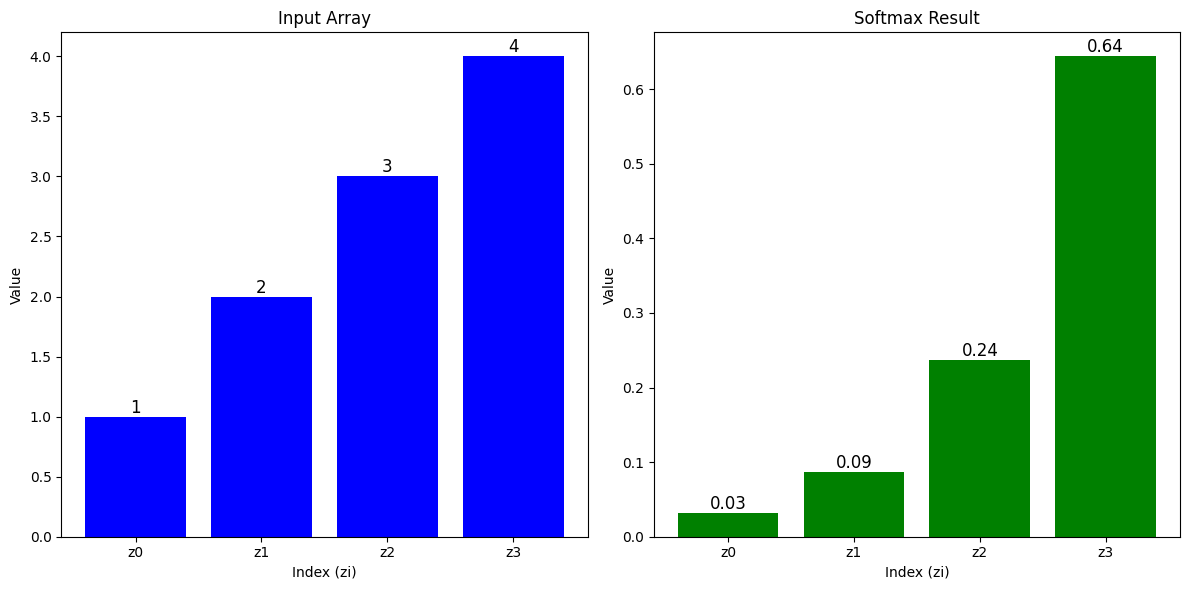

In [10]:
input_array = np.array([1, 2, 3, 4])
softmax_result = softmax(input_array)

custom_labels = ['z0', 'z1', 'z2', 'z3']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(np.arange(len(input_array)), input_array, tick_label=custom_labels, color='b')
axs[0].set_title('Input Array')
axs[0].set_xlabel('Index (zi)')
axs[0].set_ylabel('Value')
for i, v in enumerate(input_array):
    axs[0].text(i, v, str(v), ha='center', va='bottom', fontsize=12)

axs[1].bar(np.arange(len(softmax_result)), softmax_result, tick_label=custom_labels, color='g')
axs[1].set_title('Softmax Result')
axs[1].set_xlabel('Index (zi)')
axs[1].set_ylabel('Value')
for i, v in enumerate(softmax_result):
    axs[1].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### Cost Function

\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}